In [1]:
import numpy as np

from matplotlib import pyplot as plt

from tiepy.speckle.io import load_tiff_as_npy, get_keys, print_h5_keys, load_key_from_virtual_h5


In [2]:
# Load the Data and scale to image mean
IR = load_tiff_as_npy("./data/speckle00.tif")
IS = load_tiff_as_npy("./data/speckle01.tif")

IR/= np.mean(IR)
IS/= np.mean(IS)

### Load the results from the virtual dataset
master_dir = "./virtual_dataset.h5"
print_h5_keys(master_dir)
keys = get_keys(master_dir)

results = load_key_from_virtual_h5(master_dir, keys[0])
print("Keys in HDF5 Subgroup: '{}'".format(keys[0]))
print(list(results.keys()))

Keys in the HDF5 file:
test
Keys in HDF5 Subgroup: 'test'
['coords_x', 'coords_y', 'shifts_x', 'shifts_y', 'subpixel_shifts_x', 'subpixel_shifts_y']


IndexError: index 4 is out of bounds for axis 0 with size 4

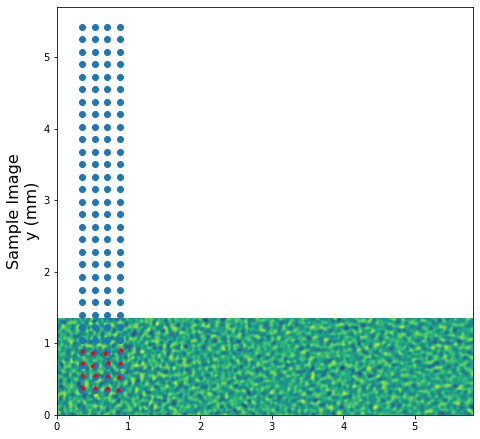

In [3]:

# Assuming IR and IS are the two images
z = 3.5  # speckle to detector distance
dx = dy = 7e-06 * 1e3 # pixel size # in mm

# Set array dimensions
ny, nx = IR.shape

x_axis = np.linspace(0, dx * (nx), nx)  # in mm
y_axis = np.linspace(0, dy * (ny), ny)  # in mm

coords_x = results['coords_x']
coords_y = results['coords_y']

ssx = results['subpixel_shifts_x']
ssy = results['subpixel_shifts_x']

# Plot Reference and Sample Speckle
fig, axes = plt.subplots(1, 1, figsize=(15, 7.5), sharex=False)
ax1 = axes

# Plot IR (Reference Image)
im1 = ax1.imshow(IR, extent=[x_axis.min(), x_axis.max(), y_axis.min(), y_axis.max()])
ax1.set_ylabel("Sample Image\ny (mm)", fontsize=16)

# for (x, y), (Vx, Vy) in zip(res['subset_centers'], res['shifts']):
#     ax1.scatter(x*1e3*dx, y*1e3*dx, c='blue', marker='o')  # Scatter the points
    
#     #Draw the arrow
#     ax1.arrow(x*1e3*dx, y*1e3*dx, 100*Vy*dx, -100*Vx*dx, head_width=0.05, head_length=0.1, fc='red', ec='red')

ax1.scatter(coords_x * dx, coords_y * dy)

for i in range(coords_x.shape[0]):
    for j in range(coords_x.shape[1]):
        
        ax1.arrow(coords_x[i,j]*dx, coords_y[i,j]*dx , ssx[i,j]*dx * 5, ssx[i,j]*dy*5,
                  head_width=0.05, head_length=0.05, fc='red', ec='red', 
                  length_includes_head =  True)
    
 

In [ ]:
plt.plot(coords_x.mean(1), ssy.mean(1))

In [ ]:
plt.imshow(ssy)

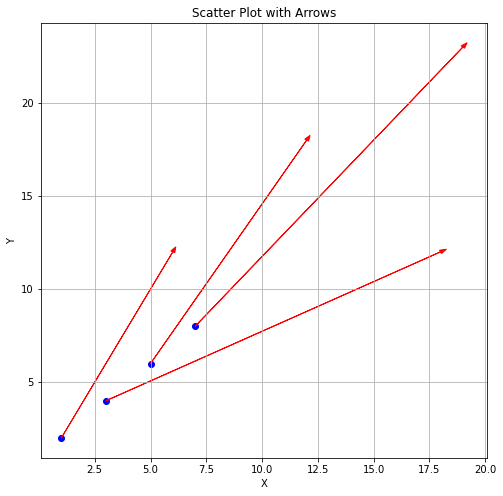

In [4]:
import matplotlib.pyplot as plt

def scatter_points_with_arrows(points, V_list):
    """
    Scatter a set of points and represent them as arrows with lengths determined by V_list.

    Parameters:
        points (list): A list of tuples (x, y) representing the coordinates of the points.
        V_list (list): A list of tuples (Vx, Vy) representing the arrow lengths in the x and y directions for each point.

    Returns:
        None (displays the scatter plot with arrows).
    """
    plt.figure(figsize=(8, 8))  # You can adjust the figure size as per your preference

    for (x, y), (Vx, Vy) in zip(points, V_list):
        plt.scatter(x, y, c='blue', marker='o')  # Scatter the points

        # Draw the arrow
        plt.arrow(x, y, Vx*10, Vy*10, head_width=0.2, head_length=0.3, fc='red', ec='red')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter Plot with Arrows')

    plt.grid(True)

    #plt.xlim([50,150])
    #plt.ylim([50,150])
    plt.show()

# Example usage:
points = [(1, 2), (3, 4), (5, 6), (7, 8)]
V_list = [(0.5, 1.0), (1.5, 0.8), (0.7, 1.2), (1.2, 1.5)]

# Example usage:
points = [(1, 2), (3, 4), (5, 6), (7, 8)]
V_list = [(0.5, 1.0), (1.5, 0.8), (0.7, 1.2), (1.2, 1.5)]
scatter_points_with_arrows(points, V_list)

The angle with the x-axis for the point (1, 2) is: -67.38 degrees
The angle with the x-axis for the point (3, 4) is: 112.25 degrees
The angle with the x-axis for the point (5, 6) is: 43.15 degrees
The angle with the x-axis for the point (7, 8) is: -116.57 degrees


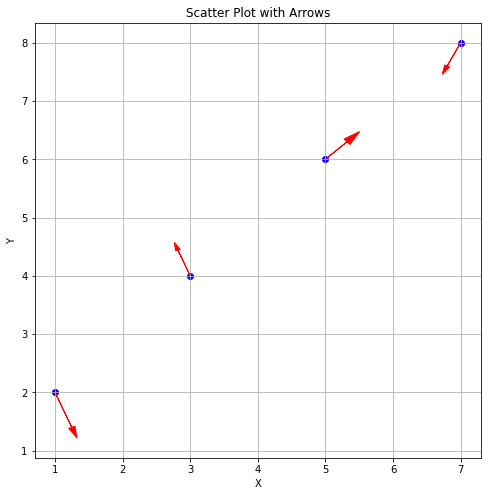

In [5]:
import matplotlib.pyplot as plt
import math

def scatter_points_with_arrows(points, V):
    """
    Scatter a set of points and represent them as arrows with lengths determined by V.
    Also, print the angle that each arrow makes with the x and y axes.

    Parameters:
        points (list): A list of tuples (x, y) representing the coordinates of the points.
        V (list): A list of tuples (Vx, Vy) representing the lengths of arrows for each point.

    Returns:
        None (displays the scatter plot with arrows).
    """
    plt.figure(figsize=(8, 8))  # You can adjust the figure size as per your preference

    for i, (x, y) in enumerate(points):
        plt.scatter(x, y, c='blue', marker='o')  # Scatter the points

        # Get the arrow length for the current point
        Vx, Vy = V[i]
        arrow_dx = abs(Vx) * 0.1  # Use abs() to ensure positive arrow direction
        arrow_dy = abs(Vy) * 0.2

        # Determine arrow direction based on the sign of Vx and Vy
        arrow_dx *= math.copysign(1, Vx)
        arrow_dy *= math.copysign(1, Vy)

        # Draw the arrow
        plt.arrow(x, y, arrow_dx, arrow_dy, head_width=abs(Vx) * 0.04, head_length=abs(Vx) * 0.08, fc='red', ec='red')

        # Calculate the angle with the x-axis
        angle_rad = math.atan2(arrow_dy, arrow_dx)
        angle_deg = math.degrees(angle_rad)

        # Print the angle
        print(f"The angle with the x-axis for the point ({x}, {y}) is: {angle_deg:.2f} degrees")

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter Plot with Arrows')
    plt.grid(True)
    plt.show()

# Example usage:
points = [(1, 2), (3, 4), (5, 6), (7, 8)]
V = [(2.5, -3.0), (-1.8, 2.2), (3.2, 1.5), (-2.0, -2.0)]
scatter_points_with_arrows(points, V)


The angle with the radial axis is: 135.00 degrees


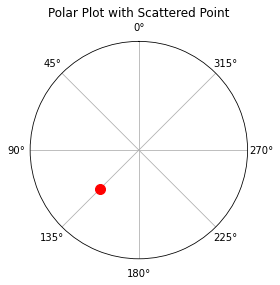

In [6]:
import matplotlib.pyplot as plt
import math

def scatter_point_on_polar_plot(x_displacement, y_displacement):
    """
    Scatter a point on a polar plot at a distance of 1 away from the origin.
    The angle is determined by the dot product angle of the x and y displacements.

    Parameters:
        x_displacement (float): The x displacement of the point.
        y_displacement (float): The y displacement of the point.

    Returns:
        None (displays the polar plot with the scattered point).
    """
    # Calculate the distance from the origin
    distance = 1

    # Calculate the angle using the dot product angle
    angle_rad = math.atan2(-x_displacement, y_displacement)
    angle_deg = math.degrees(angle_rad)

    # Create the polar plot
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.set_theta_zero_location('N')  # Set the north direction as 0 degrees

    # Plot the point on the polar plot
    ax.plot(angle_rad, distance, 'ro', markersize=10)

    # Print the angle with the radial axis
    print(f"The angle with the radial axis is: {angle_deg:.2f} degrees")

    ax.set_rlabel_position(0)  # Move the radial labels to the right
    ax.set_rticks([])  # Hide the radial ticks and labels
    ax.grid(True)

    plt.title('Polar Plot with Scattered Point')
    plt.show()

# Example usage:
x_displacement = -1
y_displacement = -1
scatter_point_on_polar_plot(x_displacement, y_displacement)
